# Harmonic Linear Chain

The equation of motion for nth mass in the chain is given by:

\begin{equation}
    m_n \ddot{q}_{n} = k_n(q_{n+1}-q_n)-k_{n-1}(q_n-q_{n-1})
\end{equation}

Where $q_n$ is the nth mass' displacement from its equilibrium position. If we assume a normal mode solution we can form a matrix equation:

\begin{equation}
\begin{bmatrix}
    \ddots & \vdots & \vdots & \vdots  &  \\
     & & & & \\
    \dots & -k_{n-1}/m_n & (k_n+k_{n-1})/m_n & -k_n/m_n  & \dots \\
     & & & & \\
     & \vdots & \vdots & \vdots & \ddots
\end{bmatrix}
\begin{bmatrix}
    \vdots \\
    q_{n-1} \\
    q_n \\
    q_{n+1} \\
    \vdots
\end{bmatrix}
=
\omega^2
\begin{bmatrix}
    \vdots \\
    q_{n-1} \\
    q_n \\
    q_{n+1} \\
    \vdots
\end{bmatrix}
\end{equation}

Hence we find an eigenvalue problem which can be solved in the usual way. The eigenvectors obtained show the relative motion of the masses in the system. 

Below we will plot the eigenfrequencies, increasing from left to right, as a blue line. The eigenvectors will be represented as N red dots, representing the relative displacements of each of the masses.

In [1]:
#NAME: Harmonic Linear Chain
#DESCRIPTION: Solving the eigenvalue problem for masses in a harmonic linear chain.

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

def tridiag(a,b,c,i = [-1,0,1]):
    return np.diag(a,i[0])+np.diag(b,i[1])+np.diag(c,i[2])
    

def create_matrix(k,m):
    
    assert(k.shape[0] == m.shape[0]+1)
    
    N = m.shape[0]
    
    diagonal = -(k[:-1]+k[1:])/m
    upper_diag = k[1:-1]/m[:-1]
    lower_diag = k[1:-1]/m[1:]
    
    K = -1.0*tridiag(lower_diag,diagonal,upper_diag)
        
    return K
  
def normalise(m,eig_vecs):
    norm = np.sum(m*np.linalg.norm(eig_vecs,axis = 0)**2)
    return eig_vecs/norm

def sort_by_freq(eig_freq,eig_vecs):
    sort_indices = np.argsort(eig_freq)
    return eig_freq[sort_indices],eig_vecs[:,sort_indices]

def eigenanalysis(k,m):
    K = create_matrix(k,m)

    eig_freq,eig_vec = np.linalg.eig(K)
    eig_vec = normalise(m,eig_vec)

    eig_freq,eig_vec = sort_by_freq(eig_freq,eig_vec)
    
    return eig_freq,eig_vec

def plotter(eig_freq,eig_vec):
    fig = plt.figure(figsize = (12,24));
    ax1 = plt.subplot(212);
    ax1.set_xticks([])
    ax1.set_ylabel('Squared frequency')
    ax1.plot(eig_freq,'b');
    ax1.set_xlim((-0.5,len(eig_freq)-0.5));
    
    ax1_2 = plt.subplot(211);
    ax1_2.set_xticks([])
    ax1_2.set_ylabel('Squared frequency')
    ax1_2.plot(eig_freq,'b');
    ax2_2 = ax1.twinx();
    ax2_2.set_ylabel('Eigenvector components')
    ax2_2.plot(eig_vec.T,'ro');
    ax2_2.set_xlim((-0.5,len(eig_freq)-0.5));

First a system of 3 unit masses connected by unit springs

Analytic solution ($x = \omega^2$):

$$ \det \begin{bmatrix}
     2 - x & -1 & 0  \\
     -1 & 2 - x & -1 \\
     0 & -1 & 2 - x
\end{bmatrix} = 0$$

$$ -x^3+6 x^2-10 x+4 = 0 \to x = 2,2\pm\sqrt{2} $$

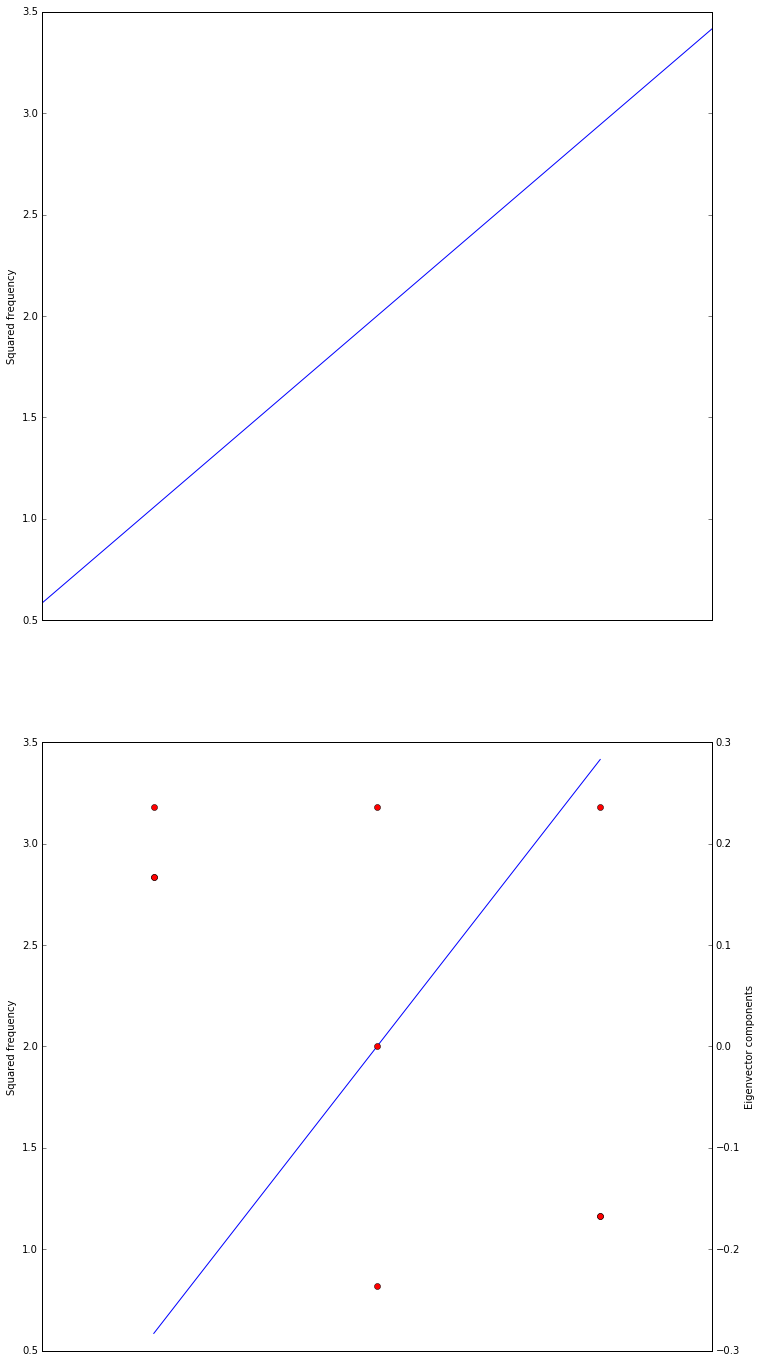

In [2]:
k = np.ones(4)
m = np.ones(3)

eig_freq,eig_vec = eigenanalysis(k,m)

plotter(eig_freq,eig_vec)

Next a set of 99 masses, every other mass having m = 1.5 while the others have m = 1. All the springs have a spring constant of 1. This approximates a diatomic chain, although the periodic boundary conditions are not respected

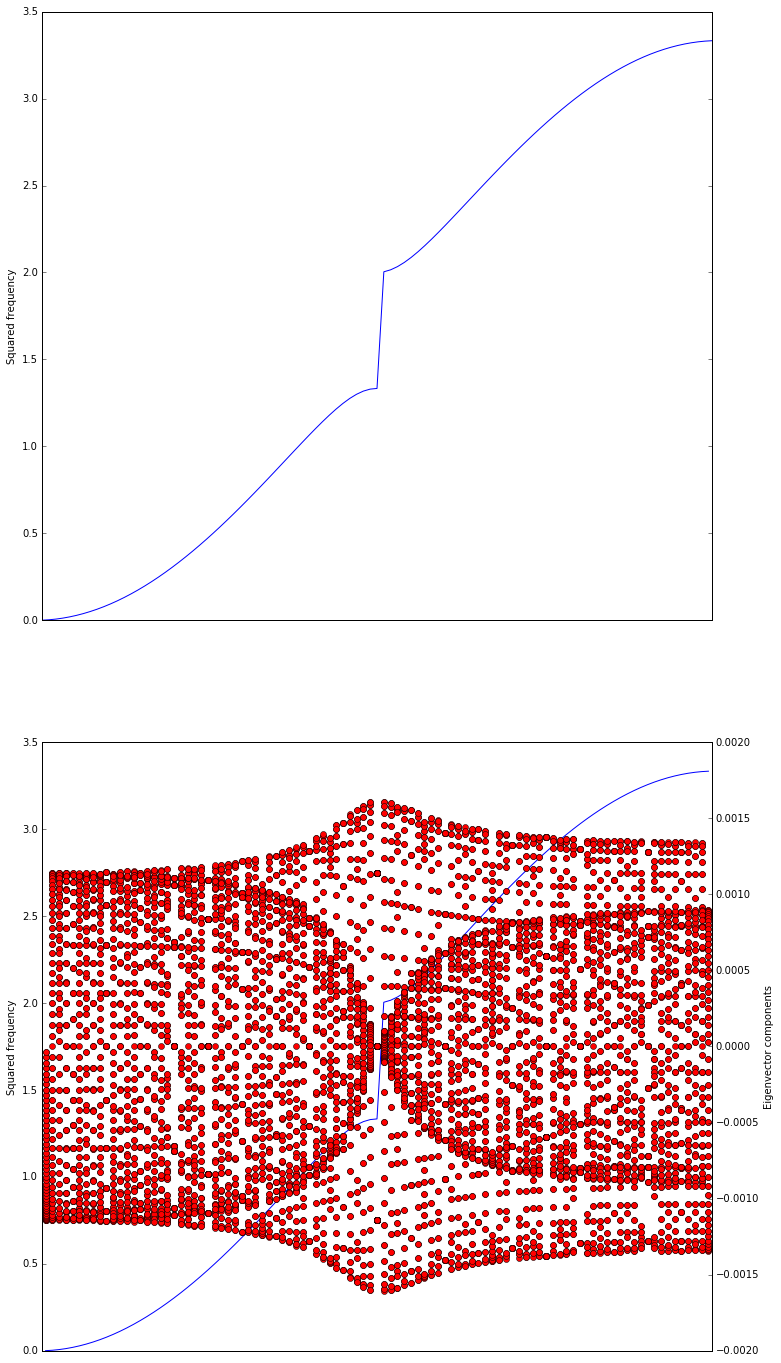

In [3]:
k = np.ones(100)
m = np.ones(99)
m[::2] = 1.5

eig_freq,eig_vec = eigenanalysis(k,m)

plotter(eig_freq,eig_vec)

## Evolution of the eigenfrequencies from broken symmetry

In this section we investigate the effect of a systems eigenfrequencies when the spring constants of some of the springs are varied. Starting with a diatomic system of 20 masses with unit springs, we start to increase the spring constants from the selected springs in k_i.

The resulting plot is reminiscent of band structure, with avoided crossings and band gaps.

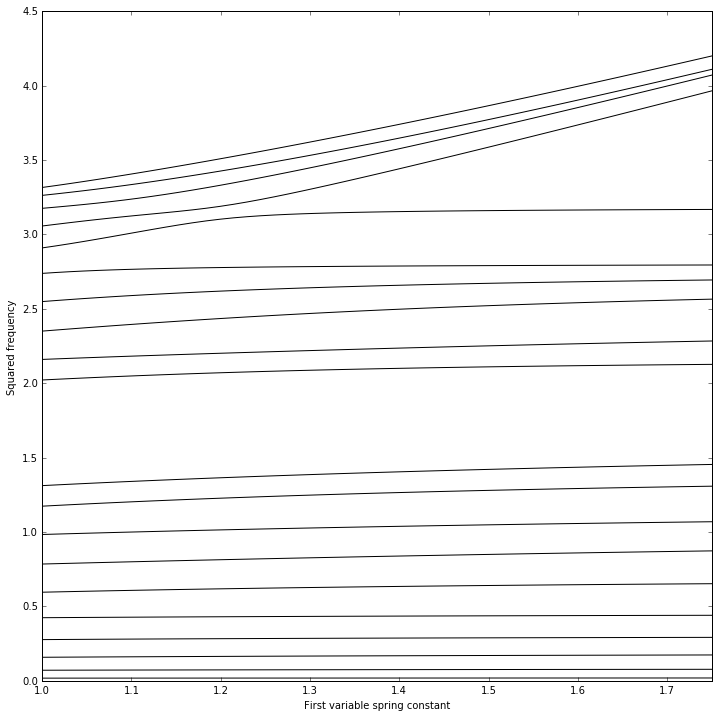

In [20]:
def freq_evolution(k,m,k_i,k_val):
    assert(len(k_i) == len(k_val))
    
    N_k = k_val[0].shape[0]
    eig_freqs = []
    
    for i in range(N_k):
        for j in range(len(k_i)):
            k[k_i[j]] = k_val[j][i]
        eig_freq,eig_vec = eigenanalysis(k,m)
        eig_freqs.append(eig_freq)
        
    fig = plt.figure(figsize = (12,12));
    ax1 = plt.subplot(111);
    ax1.set_xlim((k_val[0].min(),k_val[0].max()))
    ax1.set_xlabel('First variable spring constant')
    ax1.set_ylabel('Squared frequency')
    ax1.plot(k_val[0],eig_freqs,'k');      
    

k = np.ones(21)
m = np.ones(20)
m[::2] = 1.5

k_i = [2,6,9,13]
k_vals = np.linspace(1.,1.75,50)
k_val = [k_vals,]*len(k_i)

freq_evolution(k,m,k_i,k_val)